In [528]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [529]:
def plot_image(img):
    print(img.shape)
    plt.axis("off")
    plt.imshow(img)

def binarizar_con_umbral(gray_img, umbral):
    _, thresh = cv2.threshold(gray_img, umbral, 255, cv2.THRESH_BINARY)
    return thresh

def plot_9_umbrales(gray_img):
    umbrales = np.linspace(20, 235, 9, dtype=np.uint8)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, umbral in enumerate(umbrales):
        thresh = binarizar_con_umbral(gray_img, umbral)
        
        row = i // 3
        col = i % 3
        axes[row, col].imshow(thresh, cmap='gray')
        axes[row, col].set_title(f'Umbral {umbral}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

(1024, 1280, 3)


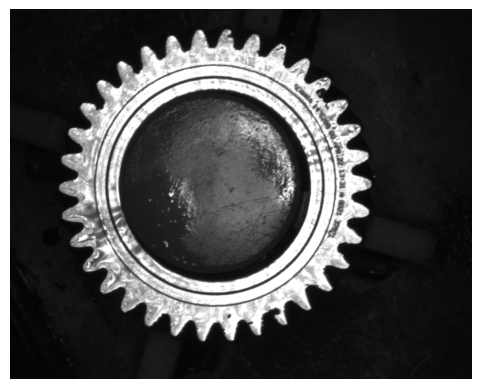

In [530]:
img = cv2.imread("ERROR/E1476208-5.bmp")
img2 = img.copy()
plot_image(img)

(1024, 1280)


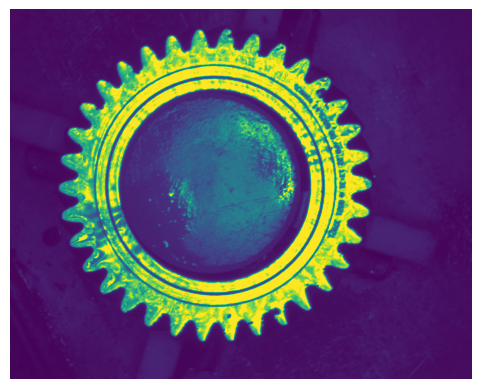

In [531]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot_image(gray)

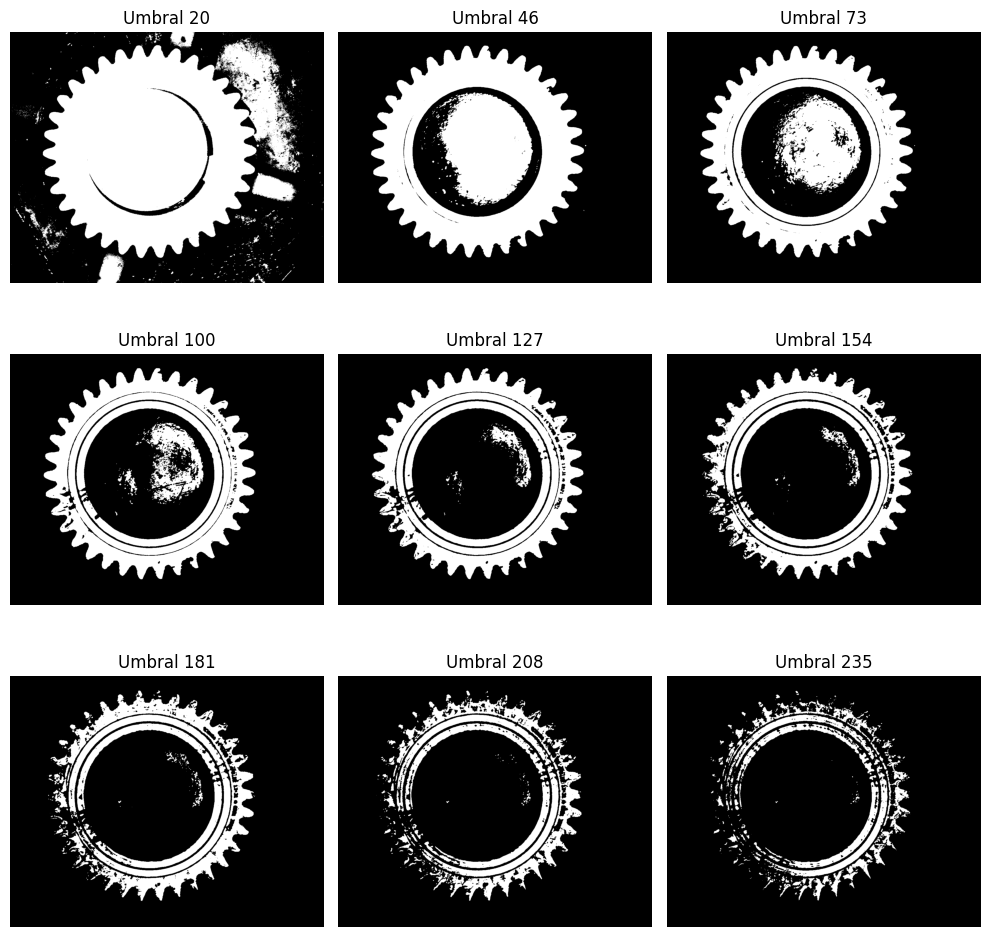

In [532]:
plot_9_umbrales(gray)

(1024, 1280)


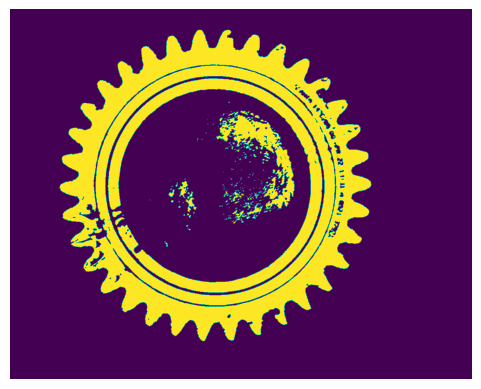

In [533]:
_,thresh = cv2.threshold(gray,110,255,cv2.THRESH_BINARY)
plot_image(thresh)

In [534]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

(1024, 1280, 3)


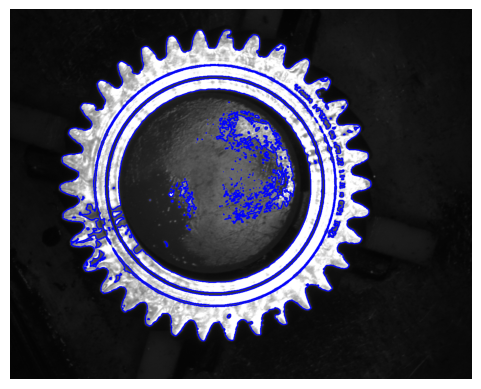

In [535]:
cv2.drawContours(img ,contours, -1, (0, 0, 255), 2)
plot_image(img)

El centroide del contorno más grande encontrado es: (567, 486)
(1024, 1280, 3)


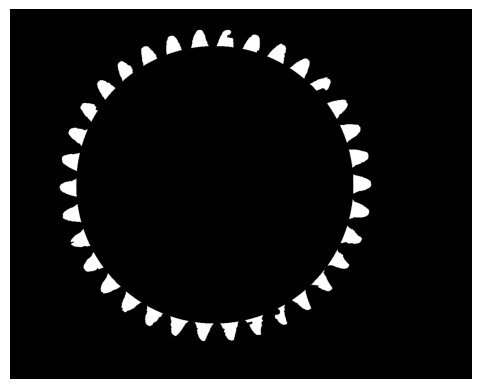

In [536]:
min_w = 650
max_w = 900
min_h = 750
max_h = 900
largest_area = 0
largest_contour = None

canvas = np.ones_like(img)

# Iterar sobre los contornos
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    
    # Condiciones para seleccionar candidatos
    if (max_w > w > min_w) and (max_h > h > min_h):
        # Encontrar el contorno más grande
        if area > largest_area:
            largest_area = area
            largest_contour = cnt

# Verificar que se encontró al menos un candidato
if largest_contour is not None:
    # Calcular el centroide del contorno más grande
    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroid = (cx, cy)
        print("El centroide del contorno más grande encontrado es:", centroid)
        
        # Dibujar un punto en el centroide sobre canvas
        canvas = np.zeros_like(img)
        # cv2.circle(canvas, (cx, cy), 5, (0,255, 0), -1)  # Dibuja un círculo rojo en el centroide
        
        # Dibujar el contorno más grande sobre canvas
        cv2.drawContours(canvas, [largest_contour],contourIdx=-1, color=(255, 255, 255), thickness=cv2.FILLED)

        
        # Calcular el radio del círculo
        dist_sum = 0
        num_points = 0
        for point in largest_contour:
            dist = np.sqrt((point[0][0] - cx)**2 + (point[0][1] - cy)**2)
            dist_sum += dist
            num_points += 1
        
        if num_points > 0:
            avg_dist = dist_sum / num_points
            radius = int(avg_dist*0.95)
            # Dibujar el círculo en el centroide con el radio calculado
            cv2.circle(canvas, (cx, cy), radius, (0, 0, 0), -1)

        # Mostrar la imagen resultante
        plot_image(canvas)
else:
    print("No se encontraron candidatos que cumplan con los criterios de tamaño.")
    print("No se encontró ningún centroide válido.")

(1024, 1280, 3)
''''''''''''''''''''''''''''''
Media: 1593.9
Mediana: 1574.0
Varianza: 4709.94
Desviación estándar: 68.62900261551233
Máximo: 1718.0
Mínimo: 1507.0
Moda: 1559.5
''''''''''''''''''''''''''''''
Se encontraron  15  dientes en el engranaje
''''''''''''''''''''''''''''''
Engranaje equivocado


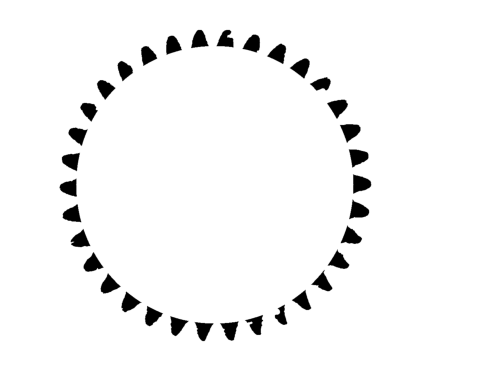

In [537]:
area_min = 1500
area_max = 1950
teeth_gray = cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
_,thresh_teeh = cv2.threshold(teeth_gray,110,255,cv2.THRESH_BINARY)
canvas_teeth, _ = cv2.findContours(thresh_teeh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
canvas_white = np.ones_like(img)*255
cv2.drawContours(canvas_white ,canvas_teeth,contourIdx=-1,color=(0,0,0), thickness=cv2.FILLED)
plot_image(canvas_white)

teeth_list = []
area_list = []

for tooth in canvas_teeth:
    x, y, w, h = cv2.boundingRect(tooth)  # Usar 'tooth' en lugar de 'cnt'
    aspect_ratio = float(w) / h
    area = cv2.contourArea(tooth)
    
    if area_max >= area >= area_min:
        area_list.append(area)
        teeth_list.append(tooth)


media = statistics.mean(area_list) if area_list else float('nan')
mediana = statistics.median(area_list) if area_list else float('nan')
varianza = np.var(area_list) if area_list else float('nan')
desviacion_estandar = np.std(area_list) if area_list else float('nan')
maximo = max(area_list) if area_list else float('nan')
minimo = min(area_list) if area_list else float('nan')
moda = statistics.mode(area_list) if area_list else float('nan')

print("''''''''''''''''''''''''''''''")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")
print(f"Moda: {moda}")
print("''''''''''''''''''''''''''''''")
if teeth_list:
    print("Se encontraron ", len(teeth_list), " dientes en el engranaje")
    print("''''''''''''''''''''''''''''''")
    if len(teeth_list) == 32:
        print("Engranaje correcto")
    else:
        print("Engranaje equivocado")
else:
    print("No se pudieron encontrar dientes")
